# TP3 TensorFlow
## Microservices

### Imports & Downloads

In [58]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [59]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Tests

In [60]:
train_images.shape

(60000, 28, 28)

In [61]:
len(train_labels)

60000

In [62]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [63]:
test_images.shape

(10000, 28, 28)

In [64]:
len(test_labels)

10000

### Preprocess & Initialisation of the Data

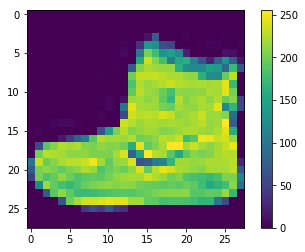

In [65]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [66]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [67]:
# Edition des class_names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Affichage d'un tableau d'éléments

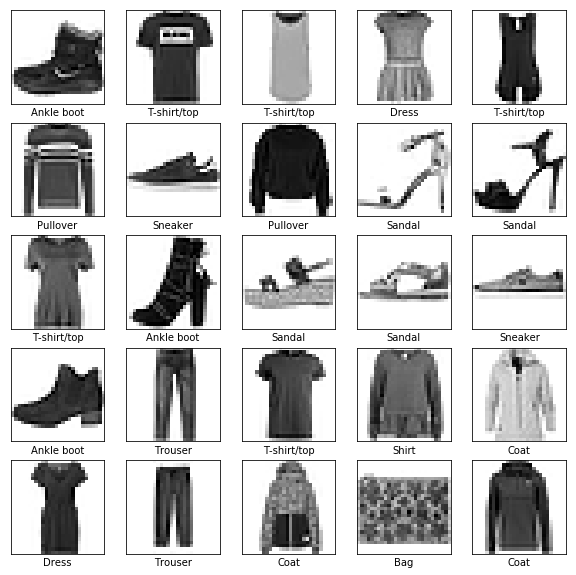

In [68]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

### Build the model

In [69]:
#Setup the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [70]:
#Compile the model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [71]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.4984 - acc: 0.8252
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3727 - acc: 0.8663
Epoch 3/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3332 - acc: 0.8800
Epoch 4/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.3124 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.2943 - acc: 0.8911


### Evaluate accuracy

In [72]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/step
('Test accuracy:', 0.8824)


### Make Prediction

In [73]:
predictions = model.predict(test_images)

In [74]:
predictions[0]

array([5.26537497e-06, 1.08125164e-07, 6.97463349e-07, 1.97318091e-08,
       7.95599647e-07, 7.19667505e-03, 3.13686314e-06, 2.96064708e-02,
       8.49939242e-05, 9.63101923e-01], dtype=float32)

In [75]:
np.argmax(predictions[0])

9

In [76]:
test_labels[0]

9

### Prediction & Prediction array tests

In [77]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

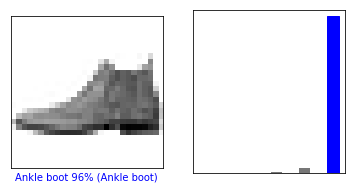

In [78]:
#Predictions & prediction array for the 0th

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

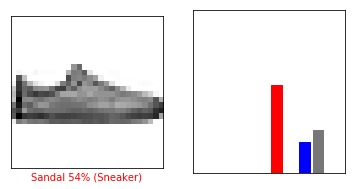

In [79]:
#Prediction & prediction array for the 12th
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

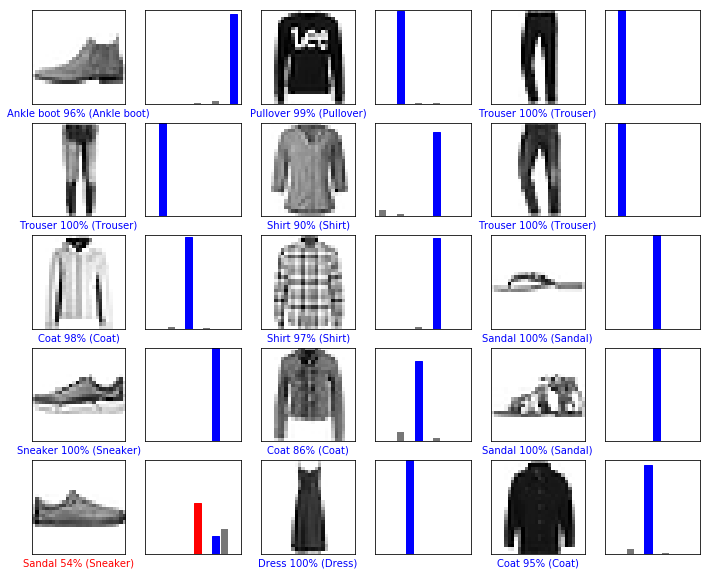

In [80]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [81]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [82]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [83]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.26535496e-06 1.08125164e-07 6.97462667e-07 1.97318837e-08
  7.95597373e-07 7.19667785e-03 3.13685723e-06 2.96064429e-02
  8.49940843e-05 9.63101923e-01]]


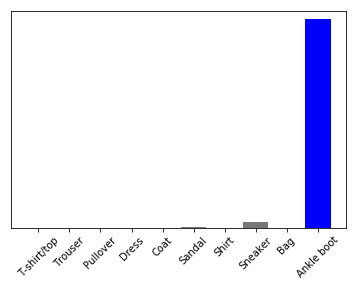

In [84]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [85]:
np.argmax(predictions_single[0])

9